# DECEPTIVE REVIEW CLASSIFIER

In [ ]:
import os
__print__ = print
def print(string):
    os.system(f'echo \"{string}\"')
    __print__(string)

In [ ]:
! pip install pytorch-transformers

In [ ]:
!pip install fastcore==1.0.9

In [ ]:
!pip install transformers

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
!pip install chart_studio
!pip install scikit-plot

In [ ]:
from fastai.text import *
from fastai.metrics import *
from transformers import RobertaTokenizer

In [ ]:
# Creating a config object to store task specific information
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)
        
config = Config(
    testing=False,
    seed = 2019,
    roberta_model_name='roberta-base', # can also be exchnaged with roberta-large 
    max_lr=1e-5,
    epochs=10,
    use_fp16=False,
    bs=16, 
    max_seq_len=256, 
    num_labels = 2,
    hidden_dropout_prob=.05,
    hidden_size=768, # 1024 for roberta-large
    start_tok = "<s>",
    end_tok = "</s>",
)

In [ ]:
import pandas as pd
import io
import os

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
pd.set_option('max_colwidth', 800)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# importing deep learning libraries
import tqdm

In [ ]:
#loading dataset
df=pd.read_csv('/content/deceptive.csv')
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n"
1,truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n"
2,truthful,hyatt,positive,TripAdvisor,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h..."
3,truthful,omni,positive,TripAdvisor,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n"
4,truthful,hyatt,positive,TripAdvisor,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district. \n"


In [ ]:
df.shape

(1600, 5)

In [ ]:
df['deceptive'].value_counts()

deceptive    800
truthful     800
Name: deceptive, dtype: int64

In [ ]:
df['polarity'].value_counts()

positive    800
negative    800
Name: polarity, dtype: int64

This is perfectly balanced dataset. Our target variable is 'deceptive'.

In [ ]:
df['hotel'].value_counts()

monaco              80
omni                80
intercontinental    80
swissotel           80
ambassador          80
affinia             80
palmer              80
conrad              80
talbott             80
allegro             80
fairmont            80
hyatt               80
homewood            80
hardrock            80
james               80
amalfi              80
knickerbocker       80
hilton              80
sofitel             80
sheraton            80
Name: hotel, dtype: int64

In [ ]:
df['source'].value_counts()

MTurk          800
Web            400
TripAdvisor    400
Name: source, dtype: int64

### DATA PREPROCESSING AND EDA

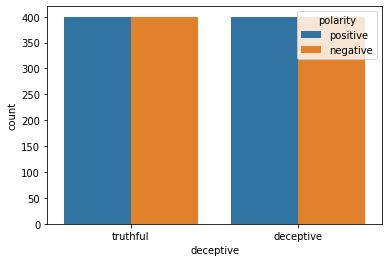

In [ ]:
import seaborn as sns
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

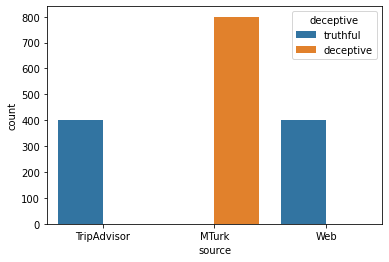

In [ ]:
sns.countplot(x=df['source'],hue='deceptive',data=df)

In [ ]:
df.columns

Index(['deceptive', 'hotel', 'polarity', 'source', 'text'], dtype='object')

In [ ]:
# so combining three text columns --- hotel, source, text
#df['text'] = df['hotel']+' '+df['source']+' '+df['text']
#df.head()

In [ ]:
# dropping unnecessary columns. 
# dropping hotel names
# dropping the source of the data
# dropping the polarity of the dataset
df.drop(['hotel', 'polarity', 'source'], axis = 1, inplace=True)
df.head()

,deceptive,text
0,truthful,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n"
1,truthful,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n"
2,truthful,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h..."
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n"
4,truthful,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district. \n"


In [ ]:
#z = {'truthful' : 1, 'deceptive' : 0}  # 1 for truthful reviews and 0 for deceptive reviews
#df['deceptive'] = df['deceptive'].map(z)

In [ ]:
df.head()

,deceptive,text
0,truthful,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n"
1,truthful,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n"
2,truthful,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h..."
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n"
4,truthful,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district. \n"


In [ ]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)

    #remove brackets and parantheses (and removing the text inside the brackets and parantheses)
    text = re.sub("[\(\[].*?[\)\]]", "", text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #Filter to allow only alphabets and numbers
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    #remove double spaces 
    text = re.sub('\s+', ' ', text)
    
    return text

In [ ]:
# applying that into function.
df["clean_text"] = df['text'].apply(lambda x: clean_text(x))
df.head(10)

,deceptive,text,clean_text
0,truthful,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n",We stayed for a one night getaway with family on a thursday Triple AAA rate of was a steal th floor room complete with in plasma TV bose stereo voss and evian water and gorgeous bathroom Concierge was very helpful You cannot beat this location Only flaw was breakfast was pricey and service was very very slow even though there were only two other tables in the restaurant Food was very good so it was worth the wait I would return in a heartbeat A gem in chicago
1,truthful,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n",Triple A rate with upgrade to view room was less than which also included breakfast vouchers Had a great view of river lake Wrigley Bldg Tribune Bldg Most major restaurants Shopping Sightseeing attractions within walking distance Large room with a very comfortable bed
2,truthful,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (h...",This comes a little late as I m finally catching up on my reviews from the past several months A dear friend and I stayed at the Hyatt Regency in late October for one night while visiting a friend and her husband from out of town This hotel is perfect IMO Easy check in and check out Lovely clean comfortable rooms with great views of the city I know this area pretty well and it s very convenient to many downtown Chicago attractions We had dinner and went clubing with our friends around Division St We had no problems getting cabs back and forth to the Hyatt and there s even public transportation right near by but we didn t bother since we only needed cabs from and to the hotel Parking as is usual for Chicago was expensive but we were able to get our car out quickly No problems at all and...
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n",The Omni Chicago 

In [ ]:
# dropping the uncleaned text column "text"
df = df.drop(['text'], axis=1)

In [ ]:
# renaming the column
df.rename(columns = {'clean_text':'review', 'deceptive' : 'sentiment'}, inplace = True)
df.head()

,sentiment,review
0,truthful,We stayed for a one night getaway with family on a thursday Triple AAA rate of was a steal th floor room complete with in plasma TV bose stereo voss and evian water and gorgeous bathroom Concierge was very helpful You cannot beat this location Only flaw was breakfast was pricey and service was very very slow even though there were only two other tables in the restaurant Food was very good so it was worth the wait I would return in a heartbeat A gem in chicago
1,truthful,Triple A rate with upgrade to view room was less than which also included breakfast vouchers Had a great view of river lake Wrigley Bldg Tribune Bldg Most major restaurants Shopping Sightseeing attractions within walking distance Large room with a very comfortable bed
2,truthful,This comes a little late as I m finally catching up on my reviews from the past several months A dear friend and I stayed at the Hyatt Regency in late October for one night while visiting a friend and her husband from out of town This hotel is perfect IMO Easy check in and check out Lovely clean comfortable rooms with great views of the city I know this area pretty well and it s very convenient to many downtown Chicago attractions We had dinner and went clubing with our friends around Division St We had no problems getting cabs back and forth to the Hyatt and there s even public transportation right near by but we didn t bother since we only needed cabs from and to the hotel Parking as is usual for Chicago was expensive but we were able to get our car out quickly No problems at all and...
3,truthful,The Omni Chicago really delivers on all fronts from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue While this address in Chicago requires a high level of quality the Omni delivers Check in for myself and a whole group of people with me was under minutes the staff had plentiful recommendations for dining and events and the rooms are some of the largest you ll find at this price range in Chicago Even the standard room has a separate living area and work desk The fitness center has free weights weight machines and two rows of cardio equipment I shared the room with others and did not feel cramped in any way All in all a great property
4,truthful,I asked for a high floor away from the elevator and that is what I got The room was pleasantly decorated functional and very clean I didn t need a whole lot of service but when I did they were pleasant and prompt I used the fitness center which was well equipped and everything was in working order It is in a great location at one end of the Michigan Avenue shopping district


## ROBERTA APPROACH USING FASTAI

RoBERTa (A Robustly Optimized BERT Pretraining Approach) BERT(Bidirectional Encoder Representations from Transformers) builds upon BERT by pretraining longer with more data, bigger batch sizes while only pretraining on masked language modeling as opposed to pretraining on next sentence prediction as well. 

### Setting Up the Tokenizer

In [ ]:
feat_cols = "review"
label_cols = "sentiment"

RoBERTa uses different default special tokens from BERT. For example, instead of [CLS] and [SEP] for starting and ending tokens, <s> and </s> are used respectively. For example, a tokenized movie review may look like:

“the movie was great” → 
 the, Ġmovie, Ġwas, Ġgreat

We will now create a Fastai wrapper around RobertaTokenizer.

In [ ]:
class FastAiRobertaTokenizer(BaseTokenizer):
    """Wrapper around RobertaTokenizer to be compatible with fastai"""
    def __init__(self, tokenizer: RobertaTokenizer, max_seq_len: int=128, **kwargs): 
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len 
    def __call__(self, *args, **kwargs): 
        return self 
    def tokenizer(self, t:str) -> List[str]: 
        """Adds Roberta bos and eos tokens and limits the maximum sequence length""" 
        return [config.start_tok] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + [config.end_tok]

Now, we can initialize our Fastai tokenizer. (Note: we have to wrap our Fastai wrapper within the Tokenizer class for Fastai compatibility)

In [ ]:
# create fastai tokenizer for roberta
from transformers import RobertaTokenizer
roberta_tok = RobertaTokenizer.from_pretrained("roberta-base")

fastai_tokenizer = Tokenizer(tok_func=FastAiRobertaTokenizer(roberta_tok, max_seq_len=config.max_seq_len), 
                             pre_rules=[], post_rules=[])

In [ ]:
roberta_tok

PreTrainedTokenizer(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})

In [ ]:
import json

In [ ]:
path = F"/content/roberta_models"

In [ ]:
roberta_tok.save_vocabulary(path)

('/content/roberta_models/vocab.json', '/content/roberta_models/merges.txt')

In [ ]:
os.chdir("/content/roberta_models")
os.listdir()

['merges.txt', 'binary.png', 'vocab.json']

In [ ]:
# create fastai vocabulary for roberta

with open('vocab.json', 'r', encoding='utf-8') as f:
    roberta_vocab_dict = json.load(f)

Next, we will load Roberta’s vocabulary.

In [ ]:
fastai_roberta_vocab = Vocab(list(roberta_vocab_dict.keys()))

In [ ]:
fastai_roberta_vocab

### Setting up pre-processors

Before we can build our Fastai DataBunch, we need to create appropriate pre-processors for the tokenizer and vocabulary.

In [ ]:
# Setting up pre-processors
class RobertaTokenizeProcessor(TokenizeProcessor):
    def __init__(self, tokenizer):
         super().__init__(tokenizer=tokenizer, include_bos=False, include_eos=False)

class RobertaNumericalizeProcessor(NumericalizeProcessor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, vocab=fastai_roberta_vocab, **kwargs)


def get_roberta_processor(tokenizer:Tokenizer=None, vocab:Vocab=None):
    """
    Constructing preprocessors for Roberta
    We remove sos and eos tokens since we add that ourselves (OUR OWN DATA) in the tokenizer.
    We also use a custom vocabulary to match the numericalization with the original Roberta model.
    """
    return [RobertaTokenizeProcessor(tokenizer=tokenizer), NumericalizeProcessor(vocab=vocab)]

#### Setting up the DataBunch

Now, we will create a DataBunch class specifically for Roberta.

In [ ]:
# Creating a Roberta specific DataBunch class
class RobertaDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training Roberta"
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=64, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, 
               dl_tfms:Optional[Collection[Callable]]=None, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            lengths = [len(t) for t in ds.x.items]
            sampler = SortSampler(ds.x, key=lengths.__getitem__)
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler, **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)

And lastly, we will also need a Roberta specific TextList class.

In [ ]:
class RobertaTextList(TextList):
    _bunch = RobertaDataBunch
    _label_cls = TextList

In [ ]:
import concurrent.futures

# loading the tokenizer and vocab processors
processor = get_roberta_processor(tokenizer=fastai_tokenizer, vocab=fastai_roberta_vocab)

In [ ]:
processor

We can now simply create a Fastai DataBunch with Roberta

In [ ]:
# creating our databunch 
data = RobertaTextList.from_df(df, ".", cols=feat_cols, processor=processor) \
    .split_by_rand_pct(seed=config.seed) \
    .label_from_df(cols=label_cols,label_cls=CategoryList) \
    .databunch(bs=config.bs, pad_first=False, pad_idx=0)




/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
data

RobertaDataBunch;

Train: LabelList (1280 items)
x: RobertaTextList
<s> Tri ple ĠA Ġrate Ġwith Ġupgrade Ġto Ġview Ġroom Ġwas Ġless Ġthan Ġwhich Ġalso Ġincluded Ġbreakfast Ġvouchers ĠHad Ġa Ġgreat Ġview Ġof Ġriver Ġlake ĠW rig ley ĠB ld g ĠTribune ĠB ld g ĠMost Ġmajor Ġrestaurants ĠShopping ĠSight seeing Ġattractions Ġwithin Ġwalking Ġdistance ĠLarge Ġroom Ġwith Ġa Ġvery Ġcomfortable Ġbed Ġ </s>,<s> This Ġcomes Ġa Ġlittle Ġlate Ġas ĠI Ġm Ġfinally Ġcatching Ġup Ġon Ġmy Ġreviews Ġfrom Ġthe Ġpast Ġseveral Ġmonths ĠA Ġdear Ġfriend Ġand ĠI Ġstayed Ġat Ġthe ĠHy att ĠReg ency Ġin Ġlate ĠOctober Ġfor Ġone Ġnight Ġwhile Ġvisiting Ġa Ġfriend Ġand Ġher Ġhusband Ġfrom Ġout Ġof Ġtown ĠThis Ġhotel Ġis Ġperfect ĠIM O ĠEasy Ġcheck Ġin Ġand Ġcheck Ġout ĠLovely Ġclean Ġcomfortable Ġrooms Ġwith Ġgreat Ġviews Ġof Ġthe Ġcity ĠI Ġknow Ġthis Ġarea Ġpretty Ġwell Ġand Ġit Ġs Ġvery Ġconvenient Ġto Ġmany Ġdowntown ĠChicago Ġattractions ĠWe Ġhad Ġdinner Ġand Ġwent Ġclub ing Ġwith Ġour Ġfriends Ġaround ĠDivision ĠS

#### Model Building

we will define the model architecture to pass to our Fastai learner. Essentially, we add a new final layer to the output of the RobertaModel. This layer will be trained specifically for the deceptive dataset sentiment classification.

In [ ]:
import torch.nn as nn
from transformers import RobertaModel

# defining our model architecture 
class CustomRobertaModel(nn.Module):
    def __init__(self,num_labels=2):
        super(CustomRobertaModel,self).__init__()
        self.num_labels = num_labels
        self.roberta = RobertaModel.from_pretrained(config.roberta_model_name)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, num_labels) # defining final output layer
        
    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _ , pooled_output = self.roberta(input_ids, token_type_ids, attention_mask, return_dict=False) # 
        logits = self.classifier(pooled_output)        
        return logits

In [ ]:
#Initialize the model
roberta_model = CustomRobertaModel(num_labels=config.num_labels)

learn = Learner(data, roberta_model, metrics=[accuracy])

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
learn.model.roberta.train() # setting roberta to train as it is in eval mode by default
learn.fit_one_cycle(config.epochs, max_lr=config.max_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.694974,0.690989,0.568750,01:09
1,0.649215,0.757951,0.603125,01:10
2,0.425698,0.565541,0.715625,01:10
3,0.279230,0.394268,0.825000,01:10
4,0.153037,0.478175,0.837500,01:10
5,0.073154,0.420954,0.878125,01:10
6,0.026628,0.533001,0.865625,01:10
7,0.024873,0.836563,0.812500,01:10
8,0.010534,0.682923,0.837500,01:10
9,0.005967,0.688391,0.837500,01:10


In [ ]:
learn.model.roberta.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [ ]:
learn.show_results()

text,target,prediction
<s> My Ġfiance Ġand ĠI Ġtraveled Ġto ĠChicago Ġfor Ġthe Ġfirst Ġtime Ġthis ĠDecember Ġand Ġwe Ġwere Ġnot Ġhappy Ġwith Ġthis Ġhotel ĠThe Ġfriend liest Ġpeople Ġon Ġthe Ġstaff Ġwere Ġthe Ġbell Ġboys ĠThey Ġgreeted Ġus Ġwith Ġa Ġsmile Ġand Ġgave Ġus Ġlots Ġof Ġgreat Ġadvice Ġthroughout Ġour Ġstay ĠThe Ġrest Ġof Ġthe Ġstaff Ġhowever Ġwas Ġterrible ĠWhen Ġwe Ġfirst Ġchecked Ġin ĠI Ġwas Ġinstantly Ġdiscouraged ĠThe Ġfront Ġdesk Ġperson,truthful,deceptive
<s> Just Ġwanted Ġto Ġlet Ġeveryone Ġknow Ġif Ġyou Ġare Ġlooking Ġfor Ġa Ġhotel Ġwith Ġhigh Ġrise Ġconstruction Ġnext Ġdoor Ġthe ĠSwiss ot el ĠChicago Ġis Ġthe Ġone Ġfor Ġyou ĠMy Ġwife Ġand ĠI Ġwent Ġthere Ġlast Ġyear Ġand Ġthere Ġwas Ġjust Ġan Ġempty Ġlot Ġnext Ġdoor Ġthis Ġyear Ġthere Ġis Ġa Ġloud Ġconstruction Ġsite Ġnext Ġdoor ĠSo Ġam ĠSaturday Ġmorning Ġyou Ġwill Ġhear Ġthe Ġworkers Ġstarting ĠI Ġam Ġsure,truthful,truthful
<s> Imagine Ġflying Ġto Ġthe Ġwind y Ġcity Ġfor Ġbusiness ĠAfter Ġa Ġlong Ġflight Ġwith Ġmany Ġdelays Ġyou Ġget Ġa Ġcab Ġto Ġyour Ġhotel Ġthe Ġmuch Ġhyp ed ĠConrad ĠYou Ġve Ġbeen Ġexpecting Ġto Ġfall Ġinto Ġa Ġsoft Ġbed Ġwith Ġa Ġlovely Ġview Ġof Ġthe ĠChicago Ġskyline Ġout Ġyour Ġwindow ĠThat Ġs Ġexactly Ġhow ĠI Ġimagined Ġit Ġafter Ġmy Ġdelayed Ġflight Ġand Ġterrible Ġcab Ġride ĠThat Ġs Ġthe Ġopposite Ġof,deceptive,deceptive
<s> I Ġreally Ġwish ĠI Ġcould Ġsay Ġthat ĠI Ġliked Ġthis Ġhotel Ġbut Ġthe Ġwhole Ġexperience Ġwas Ġjust Ġplain Ġawful ĠMy Ġfirst Ġwarning Ġsign Ġshould Ġhave Ġbeen Ġwhen ĠI Ġmade Ġmy Ġreservation ĠThe Ġperson ĠI Ġspoke Ġwith Ġwhen Ġplacing Ġmy Ġreservation Ġhad Ġabsolutely Ġno Ġidea Ġwhat Ġhe Ġwas Ġdoing ĠAt Ġfirst Ġhe Ġtried Ġto Ġbook Ġme Ġinto Ġthe Ġwrong Ġhotel Ġand Ġthen Ġwhen Ġwe Ġfinally Ġgot Ġit Ġsorted Ġwhich Ġhotel,deceptive,deceptive
<s> Am alf i ĠHotel ĠChicago Ġhas Ġseveral Ġfactors Ġthat Ġmake Ġit Ġone Ġof Ġthe Ġbest Ġhotels Ġin Ġthe Ġch icago Ġarea Ġand Ġan Ġexperience Ġyou Ġwill Ġnot Ġforget Ġin Ġa Ġlong Ġtime ĠIts Ġproximity Ġto Ġsome Ġof Ġthe Ġbest Ġspots Ġin ĠChicago Ġmakes Ġit Ġa Ġvisitor Ġs Ġdelight ĠIt Ġis Ġclose Ġto Ġthe ĠMagn ific ient ĠMile Ġwhich Ġis Ġthe Ġshopping Ġarea Ġit Ġis Ġalso Ġclose Ġto Ġthe ĠLoop,deceptive,deceptive


In [ ]:
preds, target = learn.get_preds()

In [ ]:
preds

tensor([[9.9835e-01, 1.6534e-03],
        [4.6305e-03, 9.9537e-01],
        [9.9911e-01, 8.9035e-04],
        [9.9924e-01, 7.5517e-04],
        [9.9907e-01, 9.2947e-04],
        [9.9953e-01, 4.6724e-04],
        [1.1029e-03, 9.9890e-01],
        [6.3480e-04, 9.9937e-01],
        [9.9962e-01, 3.7774e-04],
        [5.5357e-04, 9.9945e-01],
        [1.0690e-03, 9.9893e-01],
        [1.0679e-03, 9.9893e-01],
        [9.9962e-01, 3.7739e-04],
        [9.9773e-01, 2.2731e-03],
        [9.9954e-01, 4.5695e-04],
        [9.7966e-01, 2.0335e-02],
        [5.1131e-03, 9.9489e-01],
        [9.6284e-01, 3.7160e-02],
        [9.8134e-01, 1.8657e-02],
        [9.9961e-01, 3.8829e-04],
        [9.9946e-01, 5.3993e-04],
        [9.9960e-01, 4.0050e-04],
        [5.2253e-04, 9.9948e-01],
        [9.9964e-01, 3.6462e-04],
        [9.9949e-01, 5.1231e-04],
        [9.6383e-01, 3.6172e-02],
        [5.5403e-04, 9.9945e-01],
        [4.8709e-04, 9.9951e-01],
        [1.5441e-02, 9.8456e-01],
        [8.187

In [ ]:
target

tensor([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [ ]:
interpretations = ClassificationInterpretation.from_learner(learn)

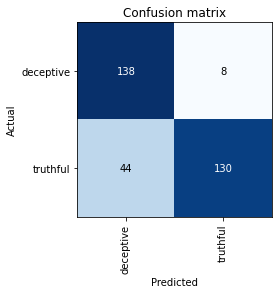

In [ ]:
interpretations.plot_confusion_matrix()

### Accuracy of Roberta model is 84%

In [ ]:
y_test = list(target.numpy())
y_pred = preds.numpy()[:,1]

In [ ]:
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
auc_score

0.9626436781609196

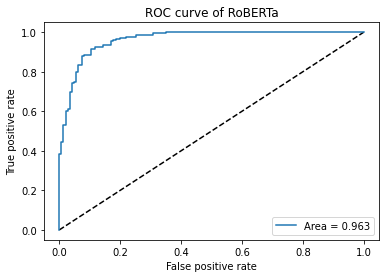

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Area = {:.3f}'.format(auc_score))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of RoBERTa')
plt.legend(loc='best')
plt.show()
plt.savefig('binary.png')

### MODEL EVALUATION

tensor(0) is deceptive and 
tensor(1) is truthful

In [ ]:
#  tensor(0) is deceptive
text = "this hotel staff is good towards me!!!"
learn.predict(text)

(Category tensor(0), tensor(0), tensor([0.9238, 0.0762]))

In [ ]:
text = "My wife and I came to spend the weekend in downtown Chicago for shopping and we found this Conrad hotel well located close to everything downtown and of a size that doesn't make you feel lost in the Convention world. We have had this feeling when staying at larger hotels in the past. Our Suite has view on Michigan avenue with a bit of the Lake at the end. Staff was very professional, pleasant and friendly making us feel very comfortable. Internet is free n the rooms and I am making my review from there. "
learn.predict(text)

(Category tensor(1), tensor(1), tensor([0.1393, 0.8607]))

In [ ]:
text = "The atmosphere at the Talbott Hotel is very welcoming when you first walk in. The employees are friendly and will greet you when you first arrive. The hotel seems to be luxurious, even from the lobby, and right away, I was very excited for my stay! I stayed in a double queen room with my friend. The room is spacious enough, and beds are very comfortable. I didn't try the room service, but they do have a fitness club close by with a spa, which is very convenient. I also love how the room has individual climate controls! Very neat! Also handy that there is an iHome in the room. I'm usually stuck using just a regular alarm clock radio at other hotels. I will most likely stay in this hotel another time. It was a wonderful experience!"
learn.predict(text)

(Category tensor(0), tensor(0), tensor([0.9790, 0.0210]))